<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle - 주택 가격 예측 (회귀, Regression)
- SquareFeet : 평방미터(평수)
- Bedrooms : 침실(수)
- Bathrooms : 욕실(수)
- Neighborhood : 동네 유형(Rural, Suburb, Urban)
- YearBuilt : 건설 연도
- Price : 주택 가격

- 선형회귀 : LinearRegression, Lasso
- 앙상블모델 : RandomForestRegressor, GradientBoostingRegressor, xgboost
- 거리 기반 : k-NN

- **사용 모델(7개, Scikit-learn 사용)**

- 선형회귀 [Linear Regression, Lasso, Ridge]

- 앙상블 [Random Forest Regressor, Gradient Boosting Regressor, XGBoost]

- 거리 기반 [k-NN(k-최근접이웃)]

- **성능** **평가 지표**

- R-Squared(R2 Score), RMSE(Root Mean Score Error)

- **데이터셋 변수(6개)**

- SquareFeet(평수), Bedrooms(방 개수), Bathrooms(화장실 개수), 도시 유형(neighborhood), 건축연도(YearBuilt), Price(주택가격)

- **예측값(종속변수, y)**

- Price(주택가격)

<코드 흐름>

1. 라이브러리 import & data load
2. EDA
- 데이터 형태 확인
- 결측치 확인
- pie chart 그려보기
- boxplot으로 이상치 확인

  3. 데이터 전처리

- **라벨인코딩(LabelEncoding)** : 카테고리를 숫자로 치환
- **원핫인코딩(One-hot Encoding)** : 열에 카테고리명 추가해서 해당되는 열(True, 1), 나머지는 (False, 0)
- heatmap 사용
1. 모델 학습
- train/test분리
- 머신러닝 학습

1. 모델 성능 평가
- R-squared, RMSE로 성능 평가

**결론(요약) :**

- 주택 가격 단위가 크기 때문에 정확한 예측은 어려우나 앞2자리는 유사하게 예측했다.
- 가장 성능이 좋았던 모델은 선형 회귀(Linear Regression)으로 R2 Score: 0.56922, RMSE는 49972.69598 수준이었다.
- 상관관계 분석을 통해 가격(Price)에 평수(SquareFeet)가 0.75로 유의미한 관계가 있음을 확인했고, 나머지는 관계가 적었다. 이 부분의 영향으로 예측 성능에 낮았을 것으로 판단된다.

- **차별점, 배울점** :
- 모델 측면에서 여러 모델과 비교해 가장 좋은 성능을 보인 모델을 선택할 수 있었다.
- k-fold 등을 이용해 데이터에 알맞는 기법을 선택해볼 수 있었다.
- 또, 가격 예측에 유의미한 데이터를 좀 더 추가할 수 있을 것 같다.
- 데이터 스케일링, 표준화를 통해 데이터를 공통 범위로 조정해볼 수도 있을 것 같다.


# 1. 라이브러리 import & 데이터 Load

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('/content/drive/MyDrive/housing_price_dataset.csv')

In [30]:
df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.284
1,2459,3,2,0,1980,195014.222
2,1860,2,1,1,1970,306891.012
3,2294,2,1,2,1996,206786.787
4,2130,5,2,1,2001,272436.239


# 2. EDA (Exploratory Data Analysis)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [9]:
# 모든 변수 결측치 확인
df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [10]:
# object 타입(동네 유형) value 개수
df['Neighborhood'].value_counts()

,count
Neighborhood,
Suburb,16721
Rural,16676
Urban,16603


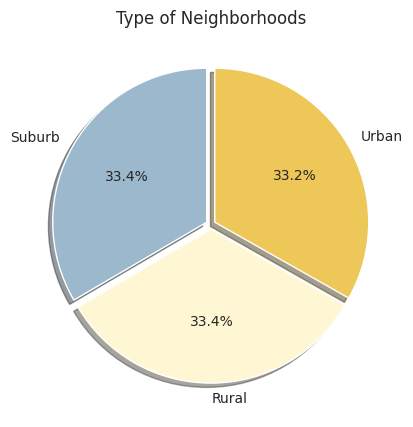

In [11]:
# Pie Chart로 확인
plt.figure(figsize=(5, 5))
explode = [0.03, 0.03, 0.03]
colors = ['#9BB8CD', '#FFF7D4', '#EEC759']

plt.pie(df["Neighborhood"].value_counts(), labels=df["Neighborhood"].value_counts().index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
plt.title('Type of Neighborhoods')
plt.show()

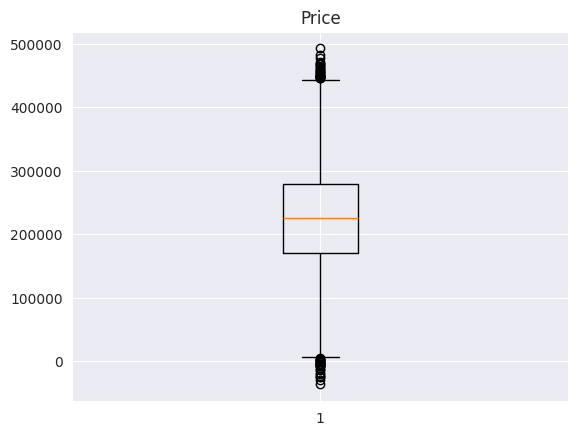

In [12]:
# Price 분포 확인
plt.boxplot(df["Price"])
plt.title('Price')
plt.show()

In [13]:
# 데이터 전체 통계
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000,50000.000,50000.000,50000.000,50000.000
mean,2006.375,3.499,1.995,1985.404,224827.325
std,575.513,1.116,0.816,20.719,76141.843
min,1000.000,2.000,1.000,1950.000,-36588.165
25%,1513.000,3.000,1.000,1967.000,169955.860
50%,2007.000,3.000,2.000,1985.000,225052.141
75%,2506.000,4.000,3.000,2003.000,279373.630
max,2999.000,5.000,3.000,2021.000,492195.260


# 3. 데이터 전처리

In [14]:
# 라벨인코딩 (object -> int형 변환)
LabelEncoder = LabelEncoder()
df['Neighborhood'] = LabelEncoder.fit_transform(df['Neighborhood'])
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.284
1,2459,3,2,0,1980,195014.222
2,1860,2,1,1,1970,306891.012
3,2294,2,1,2,1996,206786.787
4,2130,5,2,1,2001,272436.239


In [15]:
# 원핫인코딩으로 진행 시
# df = pd.get_dummies(df, dtype=int)
# df.head()

In [16]:
# 변수 간 상관관계 확인
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000,-0.003,-0.003,0.011,0.000,0.751
Bedrooms,-0.003,1.000,0.007,-0.004,0.003,0.073
Bathrooms,-0.003,0.007,1.000,0.002,0.004,0.028
Neighborhood,0.011,-0.004,0.002,1.000,-0.000,0.016
YearBuilt,0.000,0.003,0.004,-0.000,1.000,-0.002
Price,0.751,0.073,0.028,0.016,-0.002,1.000


<Axes: >

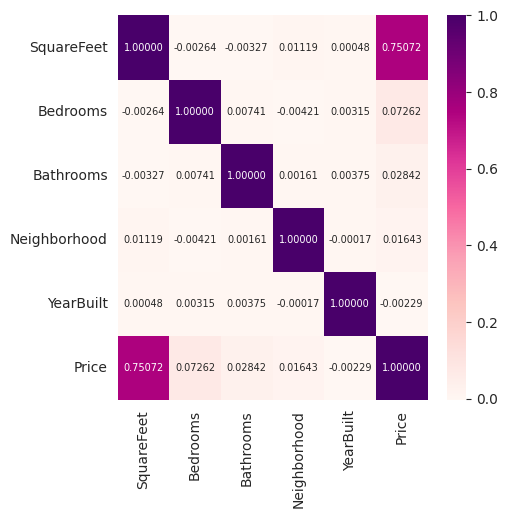

In [17]:
# Heatmap으로 상관관계 확인
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 7}, fmt='.5f', cmap='RdPu')

# 4. 모델 학습 & 성능 평가

In [18]:
# 데이터 Train, Test 나누기
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=1234
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 5) (10000, 5) (40000,) (10000,)


In [19]:
X_train.head(3)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
37174,2714,4,1,1,1969
29950,1333,2,2,0,1997
49833,2542,5,2,1,1969


In [20]:
y_train.head(3)

,Price
37174,318386.662
29950,105783.099
49833,245920.448


In [21]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 40000 entries, 37174 to 27439
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
40000 non-null  float64
dtypes: float64(1)
memory usage: 625.0 KB


In [22]:
models = [
    LinearRegression(),
    Lasso(random_state=1234),
    RandomForestRegressor(random_state=1234),
    GradientBoostingRegressor(random_state=1234),
    KNeighborsRegressor(),
    XGBRegressor(random_state=1234)
]

In [23]:
# best model 찾기
best_loss = None
best_model = None
best_score = None

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'    {model.__class__.__name__}')
    print(f'    R2_score: {round(r2, 4)}    |    RMSE: {round(rmse, 6)}')
    print('=' * 60)

    if best_loss != None:
        if best_score < r2:
            best_model = model
            best_score = r2
            best_loss = rmse

    else:
        best_model = model
        best_score = r2
        best_loss = rmse

print(f'\nBest Model : {best_model.__class__.__name__} \n    R2_score: {best_score}    |    RMSE: {best_loss}')

    LinearRegression
    R2_score: 0.5692    |    RMSE: 49972.695984
    Lasso
    R2_score: 0.5692    |    RMSE: 49972.709112
    RandomForestRegressor
    R2_score: 0.5151    |    RMSE: 53021.172577
    GradientBoostingRegressor
    R2_score: 0.5683    |    RMSE: 50025.627991
    KNeighborsRegressor
    R2_score: 0.4741    |    RMSE: 55216.337069
    XGBRegressor
    R2_score: 0.5531    |    RMSE: 50896.964578

Best Model : LinearRegression 
    R2_score: 0.5692276886706162    |    RMSE: 49972.695984341706


In [24]:
# 개별로 학습
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# 성능 평가 결과 (r2, rmse)
# r2 = r2_score(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print('R2_score: ', r2)
# print('RMSE:     ', rmse)


# 5. 결과 확인

In [25]:
# best model 기준 예측값 저장
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 성능 평가 결과 (r2, rmse)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R2_score: ', r2)
print('RMSE:     ', rmse)

# 예측값 저장
predict = pd.DataFrame({
    'Neighborhood': X_test['Neighborhood'],
    'Price': y_pred
})

R2_score:  0.5692276886706162
RMSE:      49972.695984341706


In [26]:
predict.shape

(10000, 2)

In [27]:
predict.head()

,Neighborhood,Price
20308,0,269752.579
37706,1,226515.920
6041,1,187048.154
42143,0,307241.386
23202,0,256379.404



# Appendix. 예측결과(연속형) 값과 비교

In [28]:
# X_train 데이터셋의 y_train값 평균
train_mean_price = pd.DataFrame([X_train['Neighborhood'], y_train])
train_mean_price = train_mean_price.T
train_mean_price['Neighborhood']=train_mean_price['Neighborhood'].astype('int64')

# X_test 데이터셋의 y_test값 평균
xtest_mean_price = pd.DataFrame([X_test['Neighborhood'], y_test])
xtest_mean_price = xtest_mean_price.T
xtest_mean_price['Neighborhood']=xtest_mean_price['Neighborhood'].astype('int64')

# 학습데이터 주택 가격 (X_train, y_train)
train_mean_price = pd.DataFrame(train_mean_price.groupby('Neighborhood')['Price'].mean())
# 테스트데이터 주택 가격 (X_test, y_test)
xtest_mean_price = pd.DataFrame(xtest_mean_price.groupby('Neighborhood')['Price'].mean())
# 예측한 주택 가격 (X_test, y_pred)
pred_df = pd.DataFrame(predict.groupby('Neighborhood')['Price'].mean())

# 가격 차이 (y_train - y_pred = price_difference_1, y_test-y_pred =  price_difference_2)
price_difference_0 = []
price_difference_1 = []
price_difference_2 = []
for i in range(len(train_mean_price+1)):
    price0 = train_mean_price['Price'][i] - xtest_mean_price['Price'][i]
    price1 = train_mean_price['Price'][i] - pred_df['Price'][i]
    price2 = xtest_mean_price['Price'][i] - pred_df['Price'][i]
    price_difference_0.append(price0)
    price_difference_1.append(price1)
    price_difference_2.append(price2)
price_difference_0 = pd.DataFrame(price_difference_0)
price_difference_1 = pd.DataFrame(price_difference_1)
price_difference_2 = pd.DataFrame(price_difference_2)

# 하나의 데이터프레임으로 결과 비교해보기
result_df = pd.concat([train_mean_price, xtest_mean_price, pred_df, price_difference_0, price_difference_1, price_difference_2], axis=1).reset_index()
result_df.columns = ['Neighborhood', 'Train Price', 'Test Price', 'Predict Price', 'Train-Test', 'Train-Predict', 'Test-Predict']
result_df['Neighborhood']=result_df['Neighborhood'].replace({0: 'Rural', 1: 'Suburb', 2: 'Urban'})

# 도시 유형(Neighborhood) 기준으로 평균 주택 가격 평균을 냈을 때
- Train Price(y_train) 학습 데이터 주택가격
- Test Price(y_test) 테스트 데이터 주택가격
- Predict Price(y_pred) 학습 데이터 기반 예측 결과
-Train-Test 원래 있던 50,000개 데이터를 나눠서 40,000개(X_train)과 10,000개(X_test)의 차이
- Train-Predict 머신러닝 학습(x_train, y_train) 후 예측한 결과(x_test, y_pred)의 차이
- Test-Predict 같은 데이터(X_test)의 원가격(정답, y_test)과 예측값(y_pred) 비교했을 때 차이

In [29]:
result_df

,Neighborhood,Train Price,Test Price,Predict Price,Train-Test,Train-Predict,Test-Predict
0,Rural,224033.079,224355.487,223576.574,-322.407,456.505,778.913
1,Suburb,223477.215,222283.435,222341.664,1193.780,1135.552,-58.229
2,Urban,227249.380,226835.262,224942.849,414.118,2306.531,1892.413
